In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arch
import warnings
import scipy
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
plt.style.use('seaborn-darkgrid')

In [3]:
data = pd.read_csv('/Users/hernando/Desktop/quant/validation/Portfolio.csv',sep=',')

In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].apply(lambda x : x.strftime('%Y-%m-%d'))
data.index = data['Date']
data.drop('Date',axis=1,inplace=True)

In [5]:
data = data.dropna()

In [6]:
data

,AEX,FTSE,NASDAQ,SPGREEN,USRATE,GBPEUR,USDEUR
Date,,,,,,,
2010-04-01,351.437140,5049.290000,1774.759001,8.077401,0.03859,1.129178,0.738607
2010-04-06,355.612740,5123.580000,1820.756865,8.155695,0.03968,1.136105,0.747105
2010-04-07,353.894090,5123.140000,1821.844259,8.347759,0.03863,1.139601,0.749288
2010-04-08,350.889460,5086.020000,1824.437524,8.252960,0.03896,1.141813,0.748615
2010-04-09,355.890800,5129.010000,1825.183100,8.310451,0.03888,1.142204,0.743660
...,...,...,...,...,...,...,...
2020-03-24,461.731891,4623.634709,6870.612640,4.959655,0.00816,1.091584,0.926097
2020-03-25,475.402397,4823.856933,6816.796629,5.190359,0.00858,1.086012,0.923020
2020-03-26,482.986679,4990.133373,7073.237221,5.319739,0.00811,1.101200,0.907029


In [7]:
after = data.pct_change().apply(lambda x: np.log(1+x))

In [8]:
w={'AEX':0.3,'FTSE':0.2,'NASDAQ':0.2,'SPGREEN':0.15,'USRATE':0.15,'GBPEUR':0.35,'USDEUR':0.2}
def cov_mean(pect):
    w={'AEX':0.3,'FTSE':0.2,'NASDAQ':0.2,'SPGREEN':0.15,'USRATE':0.15,'GBPEUR':0.35,'USDEUR':0.2} 
    w_1=np.array([0.3,0.2,0.2,0.15,0.15,0.35,0.2])
    cov_matrix=pect.cov()
    return np.sqrt(cov_matrix.mul(w,axis=0).mul(w,axis=1).sum().sum()), pect.mean().dot(w_1)

port_vali, port_mean = cov_mean(-after)
port_loss= after.mul(w,axis=1).sum(axis=1)*-1

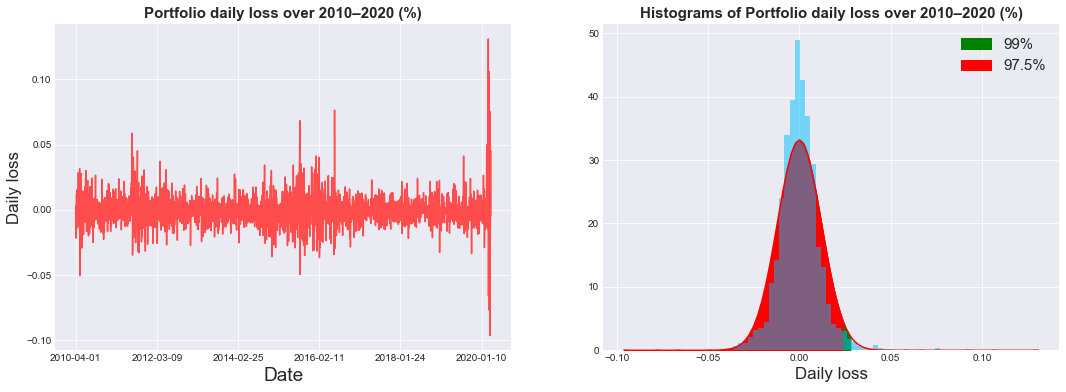

In [68]:
plt.figure(figsize=(18,6))
plt.subplot(122)
support = np.linspace(port_loss.values[1:].min(), port_loss.values[1:].max(), 100)
port_loss.hist(bins=80, density=True, histtype="stepfilled", alpha=0.5,color='#00BFFF')
plt.plot(support, scipy.stats.norm.pdf(support, loc=port_mean , scale=port_vali), "#ff0000")
# plt.fill_between(np.linspace(port_loss.values[1:].min(),scipy.stats.norm.ppf(0.975, port_mean, port_vali),100),0, scipy.stats.norm.pdf(np.linspace(port_loss.values[1:].min(),scipy.stats.norm.ppf(0.975, port_mean, port_vali),100), loc=port_mean , scale=port_vali),color='#ff0000',label='97.5%')
plt.fill_between(np.linspace(port_loss.values[1:].min(),scipy.stats.norm.ppf(0.99, port_mean, port_vali),100),0, scipy.stats.norm.pdf(np.linspace(port_loss.values[1:].min(),scipy.stats.norm.ppf(0.99, port_mean, port_vali),100), loc=port_mean , scale=port_vali),color='g',label='99%')
plt.fill_between(np.linspace(port_loss.values[1:].min(),scipy.stats.norm.ppf(0.975, port_mean, port_vali),100),0, scipy.stats.norm.pdf(np.linspace(port_loss.values[1:].min(),scipy.stats.norm.ppf(0.975, port_mean, port_vali),100), loc=port_mean , scale=port_vali),color='#ff0000',label='97.5%')
plt.title("Histograms of Portfolio daily loss over 2010–2020 (%)", weight="bold",size=15)
plt.xlabel('Daily loss',size=17)
plt.legend(fontsize=15)
plt.subplot(121)
plt.title("Portfolio daily loss over 2010–2020 (%)", weight="bold",size=15)
port_loss.plot(color='#ff4d4d')
plt.xlabel('Date',size=19)
plt.ylabel('Daily loss',size=17)
plt.savefig('dailyport_loss.jpg',dpi=200,bbox_inches='tight')

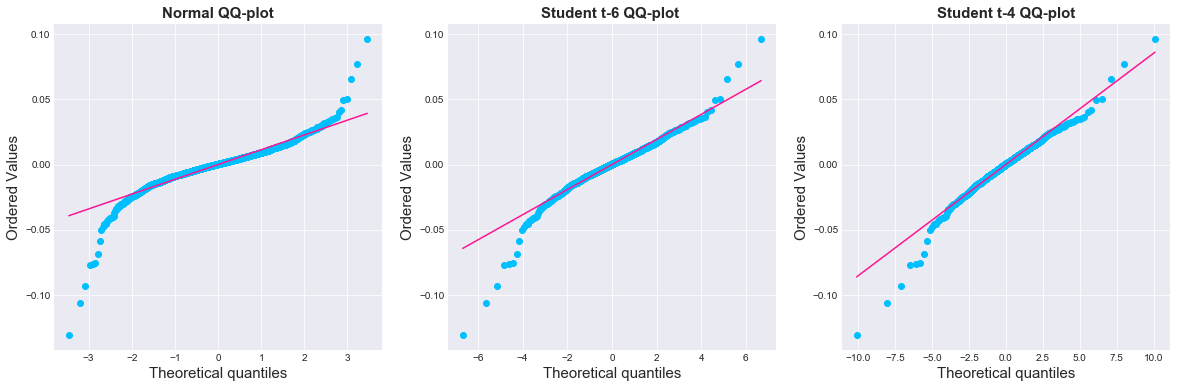

In [88]:
import pylab
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(131)
plt.subplot(131)
scipy.stats.probplot(-port_loss, dist=scipy.stats.norm, plot=pylab)
ax1.get_lines()[0].set_markeredgecolor ('#00BFFF')
ax1.get_lines()[0].set_markerfacecolor('#00BFFF')
ax1.get_lines()[1].set_color('#FF1493')
plt.title("Normal QQ-plot", weight="bold",size=15)
plt.xlabel('Theoretical quantiles',size=15)
plt.ylabel('Ordered Values',size=15)
ax1 = fig.add_subplot(132)
plt.subplot(132)
v=6
scipy.stats.probplot(-port_loss, dist=scipy.stats.t(v), plot=pylab,fit=True)
ax1.get_lines()[0].set_markeredgecolor ('#00BFFF')
ax1.get_lines()[0].set_markerfacecolor('#00BFFF')
ax1.get_lines()[1].set_color('#FF1493')
plt.title("Student t-"+str(v)+" QQ-plot ", weight="bold",size=15)
plt.xlabel('Theoretical quantiles',size=15)
plt.ylabel('Ordered Values',size=15)

ax1 = fig.add_subplot(133)
plt.subplot(133)
v=4
scipy.stats.probplot(-port_loss, dist=scipy.stats.t(v), plot=pylab,fit=True)
ax1.get_lines()[0].set_markeredgecolor ('#00BFFF')
ax1.get_lines()[0].set_markerfacecolor('#00BFFF')
ax1.get_lines()[1].set_color('#FF1493')
plt.title("Student t-"+str(v)+" QQ-plot", weight="bold",size=15)
plt.xlabel('Theoretical quantiles',size=15)
plt.ylabel('Ordered Values',size=15)
plt.savefig('dailyport_loss1qqplot.jpg',dpi=200,bbox_inches='tight')

In [15]:
from scipy.stats import t
import scipy
def Garch(stock,df):
    
    returns = df[stock][1:(len(df)-252*5)]
    am = arch.arch_model(returns, vol='Garch', p=1, o=0, q=1, dist='Normal')
    res = am.fit()

    result = pd.DataFrame(columns = [stock,'variance','vola'])
    result[stock] = df[stock]
    result['variance'][0] = 0
    result['variance'][1] = result[stock][1]**2
    result['vola'][1] = result[stock][1]
    
    
    for i in np.arange(2,len(result),1):
        result['variance'][i] = res.params['omega'] + res.params['beta[1]'] * (result['vola'][i-1]**2) + res.params['alpha[1]']*(result[stock][i-1]**2)
        result['vola'][i] = np.sqrt(result['variance'][i])
    result['variance'][1] = result[stock][1]**2
    
    result['vola'][1] = np.sqrt(result['variance'][1])
    return result

def garch_function(df,k):
    
    AEX_= Garch('AEX',df)
    FTSE_= Garch('FTSE',df)
    NASDAQ_= Garch('NASDAQ',df)
    SPGREEN_= Garch('SPGREEN',df)
    USRATE_= Garch('USRATE',df)
    GBPEUR_ = Garch('GBPEUR',df)
    USDEUR_ = Garch('USDEUR',df)
    right=df
    variance = pd.DataFrame(columns = ['AEX','FTSE','NASDAQ','SPGREEN','USRATE','GBPEUR','USDEUR'])  
    variance['AEX'] = AEX_['variance']
    variance['FTSE'] = FTSE_['variance']
    variance['NASDAQ'] = NASDAQ_['variance']
    
    variance['SPGREEN'] = SPGREEN_['variance']
    variance['USRATE'] = USRATE_['variance']
    variance['GBPEUR'] = GBPEUR_['variance']
    variance['USDEUR'] = USDEUR_['variance']
    
    volaa=pd.DataFrame(columns = ['vola'])
    volaa['vola']= AEX_['variance']
    cor_matrix=df[1:(len(df)-252*5)].corr()
    for i in np.arange(k,len(variance),1):
#         cor_matrix=right[i-k:i].corr()
        update=cor_matrix.mul(variance.iloc[i,:].values,axis=0).mul(variance.iloc[i,:].values,axis=1)
        update=update.astype(np.float64)
        w={'AEX':0.3,'FTSE':0.2,'NASDAQ':0.2,'SPGREEN':0.15,'USRATE':0.15,'GBPEUR':0.35,'USDEUR':0.2}
        volaa['vola'][i] = np.sqrt(np.sqrt(update).mul(w,axis=0).mul(w,axis=1).sum().sum())
    return volaa
        
def Garch_result(df,k):
    v=6
    vola = garch_function(df,k)
    result = pd.DataFrame(columns = ['vola','return','VaR_975','VaR_99','ES_975','ES_99'])
    result['vola'] = vola['vola'] 
#     result['return'] = port_loss
    for i in np.arange(0,len(result['return']-k),1):
#         result['VaR_975'][i] = result['return'][i:i+k].mean() + scipy.stats.norm.ppf(0.975)* vola['vola'][i] 
#         result['VaR_99'][i] = result['return'][i:i+k].mean() + scipy.stats.norm.ppf(0.99)* vola['vola'][i]
#         result['ES_975'][i] = result['return'][i:i+k].mean() +(scipy.stats.norm.pdf(scipy.stats.norm.ppf(1-0.975))/(1-0.975))* vola['vola'][i] 
#         result['ES_99'][i] = result['return'][i:i+k].mean() + (scipy.stats.norm.pdf(scipy.stats.norm.ppf(1-0.99))/(1-0.99))* vola['vola'][i]
        result['VaR_975'][i] =  + t.ppf(0.975,v)* vola['vola'][i] 
        result['VaR_99'][i] = + t.ppf(0.99, v)* vola['vola'][i]
        result['ES_975'][i] = +(scipy.stats.t.pdf(scipy.stats.t.ppf(1-0.975, v),v)/(1-0.975))*((v+scipy.stats.t.ppf(1-0.975, v)**2)/(v-1))* vola['vola'][i] 
        result['ES_99'][i] = + (scipy.stats.t.pdf(scipy.stats.t.ppf(1-0.99,v),v)/(1-0.99))*((v+scipy.stats.t.ppf(1-0.99, v)**2)/(v-1))* vola['vola'][i]

    return result

In [26]:
garchresult=Garch_result(-after,k=252)

Iteration:      1,   Func. Count:      6,   Neg. LLF: -4137.396283506047
Iteration:      2,   Func. Count:     20,   Neg. LLF: -4138.297893415692
Iteration:      3,   Func. Count:     33,   Neg. LLF: -4138.297895433869
Iteration:      4,   Func. Count:     45,   Neg. LLF: -4138.300448256075
Iteration:      5,   Func. Count:     60,   Neg. LLF: -4138.302512751238
Iteration:      6,   Func. Count:     75,   Neg. LLF: -4138.302742210904
Iteration:      7,   Func. Count:     91,   Neg. LLF: -4138.302731667494
Iteration:      8,   Func. Count:    107,   Neg. LLF: -4138.302742430193
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -4138.30274167895
            Iterations: 12
            Function evaluations: 107
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: -4230.940694065977
Iteration:      2,   Func. Count:     20,   Neg. LLF: -4231.234198766026
Positive directional derivative for linesearch    (

/Users/hernando/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in sqrt


In [27]:
bc_port = port_loss[-252*5:]
bc_garch = garchresult[-252*5:]

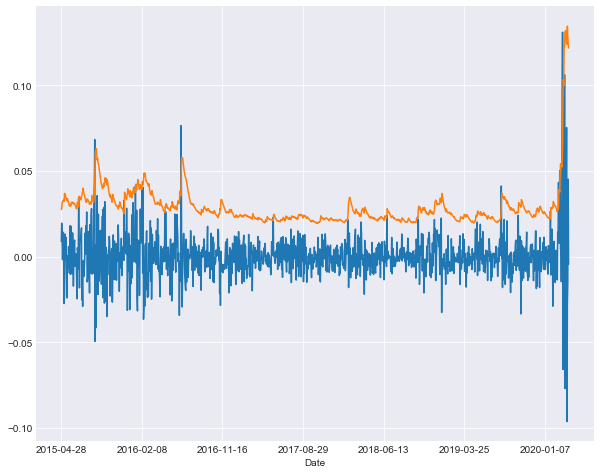

In [28]:
plt.figure(figsize=(10,8))
bc_port.plot()
bc_garch.VaR_975.plot()

Date
2015-04-28    0.008902
2015-04-29    0.019534
2015-04-30    0.008307
2015-05-04   -0.001765
2015-05-05    0.007962
                ...   
2020-03-24   -0.096298
2020-03-25   -0.027551
2020-03-26   -0.015520
2020-03-27    0.045246
2020-03-30   -0.004534
Length: 1260, dtype: float64

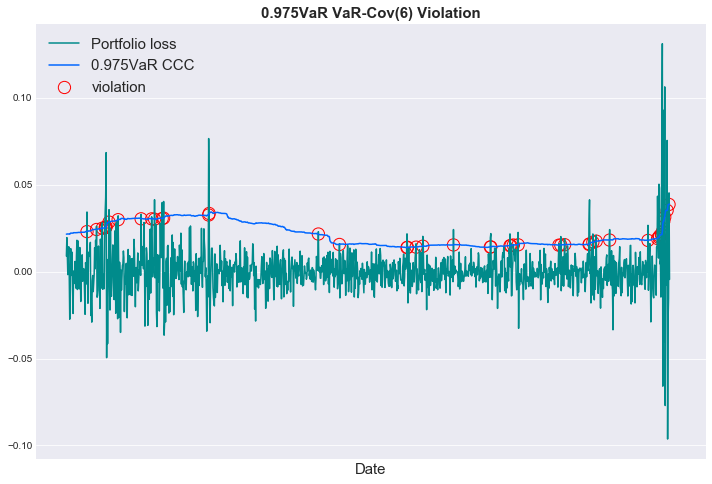

In [30]:
bc_port = port_loss[-252*5:]
plt.figure(figsize=(12,8))
# plt.bar(bc_port.index,bc_port,color=port_color,label='Port')
bc_port.plot(color='#008B8B',label='Portfolio loss')
plt.plot(t_result_1[-252*5:].VaR_975,color='#0066ff',label='0.975VaR CCC ')
plt.scatter(t_result_1[-252*5:].VaR_975[bc_port>t_result_1[-252*5:].VaR_975].index,bc_garch.VaR_975[bc_port>t_result_1[-252*5:].VaR_975].values,
            marker='o',c='',edgecolor='#ff0000',s=150,label='violation')
plt.xticks([])
plt.legend(fontsize=15)
plt.xlabel('Date',size=15)
plt.title("0.975VaR VaR-Cov(6) Violation", weight="bold",size=15)
plt.savefig('Violation_var_cov(6).jpg',dpi=200,bbox_inches='tight')

In [14]:
from scipy.stats import t
import scipy
def student_std_mean(df,v):
    port_vali, port_mean = cov_mean(df)
    student_vali = port_vali * np.sqrt((v-2)/v)
    return student_vali,port_mean
    
    

def Diff_studentt(df,v,k):
    
    result=df
    dataframe=pd.DataFrame(columns = ['VaR_975','VaR_99','ES_975','ES_99'])
    dataframe['VaR_975']=result['AEX']
    for i in range (0,len(result)-k,1):
        port_vali, port_mean = student_std_mean(result[i:i+k],v)
        dataframe['VaR_975'][i+k:i+k+1]=(port_mean +t.ppf(0.975,v)*port_vali)
        dataframe['VaR_99'][i+k:i+k+1] = (port_mean +t.ppf(0.99, v)*port_vali)
        dataframe['ES_975'][i+k:i+k+1]= (port_mean + port_vali*(scipy.stats.t.pdf(scipy.stats.t.ppf(1-0.975, v),v)/(1-0.975))*((v+scipy.stats.t.ppf(1-0.975, v)**2)/(v-1)))
        dataframe['ES_99'][i+k:i+k+1] = (port_mean + port_vali*(scipy.stats.t.pdf(scipy.stats.t.ppf(1-0.99,v),v)/(1-0.99))*((v+scipy.stats.t.ppf(1-0.99, v)**2)/(v-1)))
    
    return dataframe

In [15]:
t_result_1= Diff_studentt(after,v=6,k=252)

# Backtest

In [25]:

def find_number_year_garch(filter_result,port_loss,k,s=252):
    result=filter_result.VaR_975[k*s:(k+1)*s][port_loss[k*s:(k+1)*s]>filter_result.VaR_975[k*s:(k+1)*s]].size
    return result

def find_number_year_garch_99(filter_result,port_loss,k,s=252):
    result=filter_result.VaR_99[k*s:(k+1)*s][port_loss[k*s:(k+1)*s]>filter_result.VaR_99[k*s:(k+1)*s]].size
    return result


def backtest(Va,garchresult,port_loss):
    result = pd.DataFrame(columns = ['garch'])
    result['garch']=np.arange(0,5,1)
    result.index= np.arange(0,5,1)
    
    if Va==0.975:
        for i in np.arange(0,5,1):
            result['garch'][i]= find_number_year_garch(garchresult,port_loss,k=i,s=252)
    else:
        for i in np.arange(0,5,1):
            result['garch'][i]= find_number_year_garch_99(garchresult,port_loss,k=i,s=252)
    return result
        

In [26]:
backtest(0.975,t_result_1[-252*5:],bc_port)

,garch
0,13
1,2
2,6
3,7
4,19


In [27]:
scipy.stats.binom_test(18,n=252*5,p=0.025)

0.011356505338371058

In [28]:
backtest(0.99,bc_garch,bc_port)

,garch
0,7
1,1
2,2
3,5
4,13


In [23]:
scipy.stats.binom_test(8,n=252*5,p=0.01)

0.2542759727996707

In [89]:
252*5

1260